In [1]:
!pip install spacy
# Jupyter cell: exp5_6_spacy_jupyter.py (paste into one cell and run)
# Uses only spaCy. No CSV. Explicit if/elif/else logic.

import spacy
import matplotlib.pyplot as plt
from collections import Counter




[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# -----------------------------
# 0) Ensure model is available
# -----------------------------
try:
    nlp = spacy.load("en_core_web_sm")
except Exception:
    # If model missing, download then load
    import sys
    print("en_core_web_sm not found — downloading now (this runs only once)...")
    import spacy.cli
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")



In [20]:
# -----------------------------
# 1) Edit your clinical text / notes here
# -----------------------------
clinical_text = (
    "The patient was diagnosed with diabetes mellitus and hypertension. "
    "Metformin was started. He reports chest pain and shortness of breath."
)

clinical_notes = [
    "Patient improving after medication.",
    "Severe chest pain persists and breathing is difficult.",
    "Condition stable, no significant change.",
    "Symptoms worsened overnight despite treatment."
]



In [16]:
# -----------------------------
# 2) Tiny sentiment lexicon (expand as needed)
# -----------------------------
POS = {
    "improve", "improved", "improving", "better", "stable", "recover",
    "recovered", "normal", "resolved", "improvement", "relieved"
}
NEG = {
    "severe", "worse", "worsened", "worsening", "pain", "difficult",
    "dizziness", "dizzy", "fever", "persistent", "critical", "unstable",
    "persist", "persistent", "worsen", "worsened", "worry"
}


In [17]:

# -----------------------------
# 3) Experiment 5: NER (spaCy)
# -----------------------------
doc = nlp(clinical_text)
print("\n--- Experiment 5: Named Entity Recognition (spaCy) ---")
if len(doc.ents) == 0:
    print("No entities found.")
else:
    for ent in doc.ents:
        # print entity text and label (explicit formatting)
        print("Entity text: '{}'".format(ent.text))
        print("Entity label:", ent.label_)
        print("-" * 40)




--- Experiment 5: Named Entity Recognition (spaCy) ---
Entity text: 'Metformin'
Entity label: PERSON
----------------------------------------


In [18]:
# -----------------------------
# 4) Experiment 6: Rule-based Sentiment
#    (explicit branching, no ternaries)
# -----------------------------
print("\n--- Experiment 6: Sentiment (tiny rule-based lexicon) ---")
sentiment_results = []  # will store tuples (note, comp_score, label)

for note in clinical_notes:
    doc_n = nlp(note)           # spaCy tokenization + lemmatization
    score = 0                   # integer score from lexicon matches
    token_count = 0             # number of alphabetic tokens considered

    # iterate tokens and update score
    for token in doc_n:
        if token.is_alpha:
            token_count = token_count + 1
            lemma = token.lemma_.lower()
            # check positive lexicon
            if lemma in POS:
                score = score + 1
            # check negative lexicon
            if lemma in NEG:
                score = score - 1

    # normalize to get a compound-like score (avoid division by zero)
    if token_count == 0:
        compound = 0.0
    else:
        compound = score / token_count

    # explicit thresholds to determine label
    if compound >= 0.05:
        label = "Positive"
    elif compound <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"

    # print results (full, explicit)
    print("Note: {}".format(note))
    print("Token count:", token_count)
    print("Raw score (pos - neg):", score)
    print("Compound score (normalized): {:+0.3f}".format(compound))
    print("Assigned label:", label)
    print("-" * 40)

    sentiment_results.append((note, compound, label))




--- Experiment 6: Sentiment (tiny rule-based lexicon) ---
Note: Patient improving after medication.
Token count: 4
Raw score (pos - neg): 1
Compound score (normalized): +0.250
Assigned label: Positive
----------------------------------------
Note: Severe chest pain persists and breathing is difficult.
Token count: 8
Raw score (pos - neg): -4
Compound score (normalized): -0.500
Assigned label: Negative
----------------------------------------
Note: Condition stable, no significant change.
Token count: 5
Raw score (pos - neg): 1
Compound score (normalized): +0.200
Assigned label: Positive
----------------------------------------
Note: Symptoms worsened overnight despite treatment.
Token count: 5
Raw score (pos - neg): -1
Compound score (normalized): -0.200
Assigned label: Negative
----------------------------------------


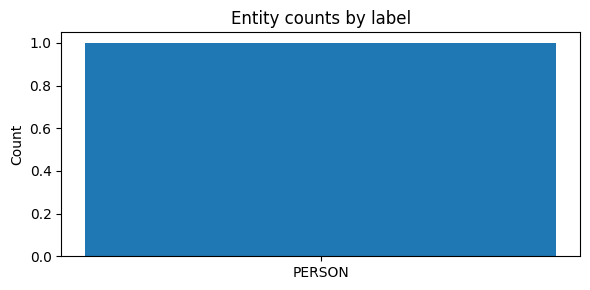

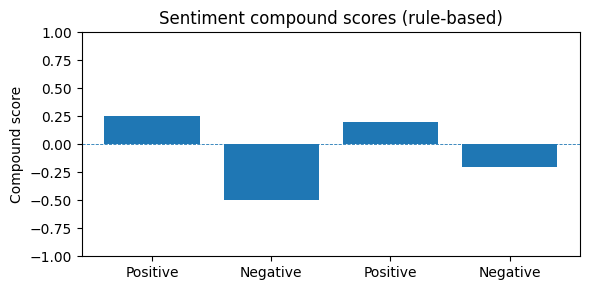

In [19]:
# -----------------------------
# 5) Simple plots (Jupyter friendly)
#    - Entity counts by label
#    - Sentiment compound scores (signed)
# -----------------------------
# Entity counts
labels = [ent.label_ for ent in doc.ents]
if len(labels) > 0:
    counts = Counter(labels)
    lab_names = list(counts.keys())
    lab_vals = [counts[k] for k in lab_names]

    plt.figure(figsize=(6,3))
    plt.bar(range(len(lab_vals)), lab_vals)
    plt.xticks(range(len(lab_vals)), lab_names)
    plt.title("Entity counts by label")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No entities to plot.")

# Sentiment scores plot
if len(sentiment_results) > 0:
    x = list(range(len(sentiment_results)))
    y = []
    x_labels = []
    for (note, comp, label) in sentiment_results:
        # decide sign: Positive -> comp, Negative -> -comp if you prefer sign,
        # but here we will just plot compound as-is (can be negative or positive)
        y.append(comp)
        x_labels.append(label)

    plt.figure(figsize=(6,3))
    plt.bar(x, y)
    plt.xticks(x, x_labels)
    plt.ylim(-1,1)
    plt.axhline(0, linewidth=0.6, linestyle='--')
    plt.title("Sentiment compound scores (rule-based)")
    plt.ylabel("Compound score")
    plt.tight_layout()
    plt.show()
else:
    print("No sentiment results to plot.")


In [29]:
# Simple Q-learning (no pandas -> no crash)
import numpy as np, random

# Setup
S, A = 5, 4
Q = np.zeros((S, A))
R = np.array([
    [0, -1, 10, -10],
    [0, -2, -5,   2],
    [0, -2, -8,   5],
    [0, -3,-10,   8],
    [0, -3,-10,  10],
])

lr, disc, eps = 0.1, 0.9, 0.2
episodes = 500
end = {2, 3}
names = ["Nothing", "Test", "DiagHealthy", "DiagDiseased"]

# Train
for _ in range(episodes):
    s = random.randrange(S)
    while True:
        a = random.randrange(A) if random.random() < eps else int(Q[s].argmax())
        r = R[s, a]
        s2 = random.randrange(S)
        Q[s, a] += lr * (r + disc * Q[s2].max() - Q[s, a])
        if a in end: break
        s = s2

# Print Q-table neatly without pandas
print("Q-table (rows=state, cols=action):")
print("Actions:", ", ".join(names))
for i, row in enumerate(Q):
    fmt = " ".join(f"{v:6.2f}" for v in row)
    print(f"State {i}: {fmt}")

# Policy
policy = Q.argmax(axis=1)
print("\nPolicy:")
for i,p in enumerate(policy):
    print(f"State {i} -> {names[p]}")

# Test helper
def diagnose(lv): print(f"Symptom {lv} -> {names[policy[lv]]}")
diagnose(0); diagnose(2); diagnose(4)


Q-table (rows=state, cols=action):
Actions: Nothing, Test, DiagHealthy, DiagDiseased
State 0:  11.49  10.80  40.01   3.02
State 1:  29.07  12.31  18.48  14.02
State 2:  30.67  10.99  10.76  20.13
State 3:  30.91  16.01   9.64  14.42
State 4:  18.62   6.68  12.99  41.35

Policy:
State 0 -> DiagHealthy
State 1 -> Nothing
State 2 -> Nothing
State 3 -> Nothing
State 4 -> DiagDiseased
Symptom 0 -> DiagHealthy
Symptom 2 -> Nothing
Symptom 4 -> DiagDiseased


In [ ]:
# What the output means (short)

# Each row = a patient state (0 Healthy → 4 Critical).

# Each column = an action (Nothing, Test, DiagHealthy, DiagDiseased).

# Numbers = Q-values (higher = better expected long-term reward if you take that action in that state).

# Policy = best action per state (argmax of each row).

# Quick interpretation of your table

# State 0 (Healthy) → DiagHealthy has highest Q (40.01). The agent learned diagnosing healthy immediately is highly rewarded here.

# States 1–3 (Mild → Severe) → Nothing is best. That means the Q-updates and reward setup made waiting/doing nothing often lead to higher long-term reward than testing/diagnosing (maybe because tests/diagnosis have negative short rewards).

# State 4 (Critical) → DiagDiseased is best (41.35) — good: critical → diagnose diseased.